# Análisis Exploratorio de Datos

## Objetivos

* Explorar características para predecir el precio de un automóvil
* Analizar patrones y realizar análisis estadísticos descriptivos
* Agrupar datos según los parámetros identificados y crear tablas dinámicas
* Identificar el efecto de los atributos independientes en el precio de los automóviles

## Diccionario de Variables

| Variable             | Descripción breve |
|----------------------|-------------------|
| **symboling** | Nivel de riesgo del seguro del vehículo. |
| **normalized-losses** | Pérdidas normalizadas por riesgo. |
| **make** | Marca del vehículo. |
| **num-of-doors** | Cantidad de puertas. |
| **body-style** | Tipo de carrocería. |
| **drive-wheels** | Tipo de tracción. |
| **engine-location** | Ubicación del motor. |
| **wheel-base** | Distancia entre ejes. |
| **length** | Largo del vehículo. |
| **width** | Ancho del vehículo. |
| **height** | Altura del vehículo. |
| **curb-weight** | Peso sin carga. |
| **engine-type** | Tipo de motor. |
| **num-of-cylinders** | Cantidad de cilindros. |
| **engine-size** | Tamaño del motor (cc). |
| **fuel-system** | Sistema de combustible. |
| **bore** | Diámetro del cilindro. |
| **stroke** | Carrera del pistón. |
| **compression-ratio** | Relación de compresión. |
| **horsepower** | Potencia del motor. |
| **peak-rpm** | RPM máxima. |
| **city-mpg** | Rendimiento urbano (mi/gal). |
| **highway-L/100km** | Consumo en ruta (L/100 km). |
| **price** | Precio. |
| **city-L/100km** | Consumo en ciudad (L/100 km). |
| **horsepower-binned** | Categoría de potencia. |
| **fuel-type-diesel** | Indicador: motor diésel. |
| **fuel-type-gas** | Indicador: motor nafta. |
| **aspiration-std** | Aspiración estándar. |
| **aspiration-turbo** | Indicador de turbo. |


In [1]:
#import os
#path = r"C:\PROYECTOS\data_analysis"
#os.chdir(path)
#print(os.getcwd())
#print(os.listdir())

C:\PROYECTOS\data_analysis
['automobile.csv', 'automobile_limpio.csv', 'laptops.csv', 'laptops_es.csv', 'laptops_limpio.csv']


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_file = 'automobile_limpio.csv'

In [4]:
df = pd.read_csv(path_file)

In [5]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [6]:
# tipos de datos de las columnas
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
horsepower-binned     object
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration-std          bool
aspiration-turbo        bool
dtype: object

In [7]:
# eliminar columna de tipo residual
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
# Restringimos solo a las variables numericas:
numeric_col = []
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        numeric_col.append(col)

In [9]:
data = df[numeric_col]
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [10]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133


#### Verificamos la correlación por separado de:

- bore:	diámetro del cilindro.
- stroke:	carrera del pistón.
- compression-ratio:	relación de compresión.
- horsepower:	potencia del motor.
- price: precio del vehículo
- engine-size: Tamaño del motor (cc)

In [11]:
data[["bore","stroke","compression-ratio","horsepower", "engine-size","price"]].corr()

,bore,stroke,compression-ratio,horsepower,engine-size,price
bore,1.000000,-0.055390,0.001263,0.566903,0.572609,0.543155
stroke,-0.055390,1.000000,0.187871,0.098128,0.205928,0.082269
compression-ratio,0.001263,0.187871,1.000000,-0.214489,0.028889,0.071107
horsepower,0.566903,0.098128,-0.214489,1.000000,0.822668,0.809607
engine-size,0.572609,0.205928,0.028889,0.822668,1.000000,0.872335
price,0.543155,0.082269,0.071107,0.809607,0.872335,1.000000


## Variables numéricas continuas
- Diagramas de dispersión con líneas ajustadas

Vemos la relación lineal entre variables:
- tamaño del motor (engine-size) como variable predictora potencial del precio
- El rendimiento urbano (city-mpg) como variable predictoria potencial del precio
- stroke - precio
  

(0.0, 53240.18964361266)

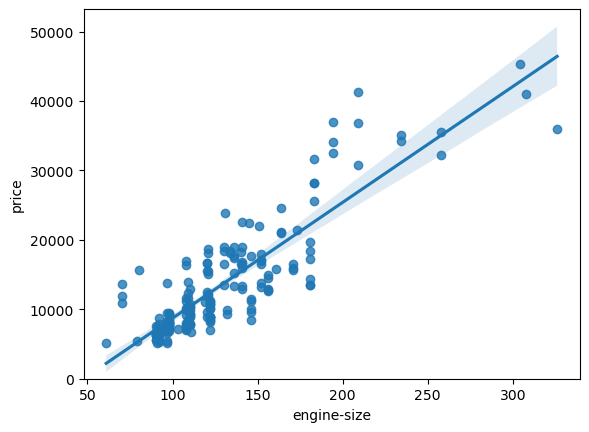

In [12]:
sns.regplot(x="engine-size", y="price", data=data)
plt.ylim(0,)

A medida que el tamaño del motor aumenta, el precio sube.

(0.0, 48247.96882902157)

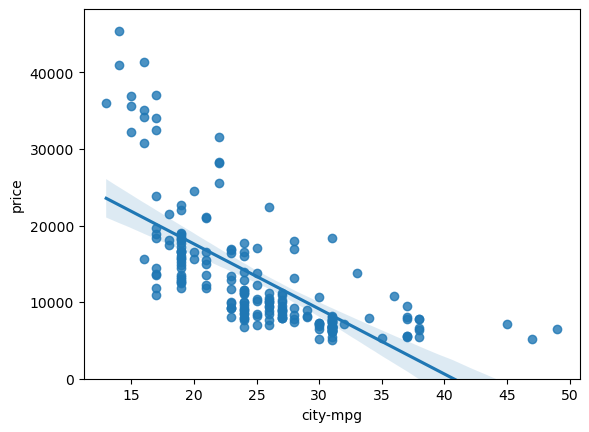

In [13]:
sns.regplot(x='city-mpg', y='price', data=data)
plt.ylim(0,)

A mayor city-mpg (mayor eficiencia, menor consumo), el precio del vehículo tiende a disminuir.

In [14]:
data[["stroke","price"]].corr() 

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


(0.0, 47414.1)

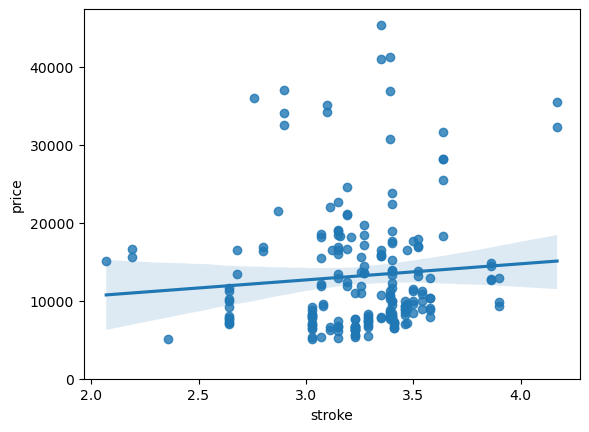

In [15]:
sns.regplot(x='stroke', y='price', data=data)
plt.ylim(0,)

Correlación débil

## Variables categóricas
- boxplots

<Axes: xlabel='body-style', ylabel='price'>

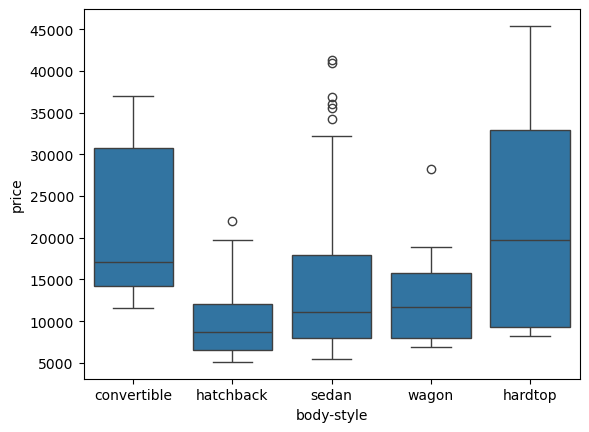

In [16]:
sns.boxplot(x='body-style', y='price', data=df)

Vemos que las distribuciones de precio entre las diferentes categorías de body-style tienen una superposición significativa, por lo que body-style no sería un buen predictor del precio.

<Axes: xlabel='engine-location', ylabel='price'>

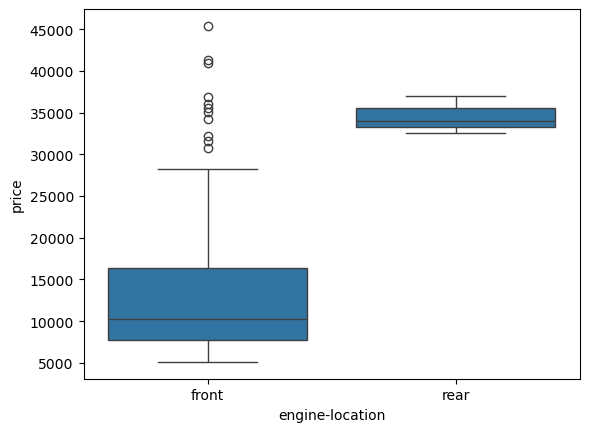

In [17]:
sns.boxplot(x="engine-location", y="price", data=df)

Aquí vemos que la distribución de precio entre estas dos categorías de engine-location, frontal y trasera, es lo suficientemente distinta como para tomar engine-location como un potencial buen predictor del precio

<Axes: xlabel='drive-wheels', ylabel='price'>

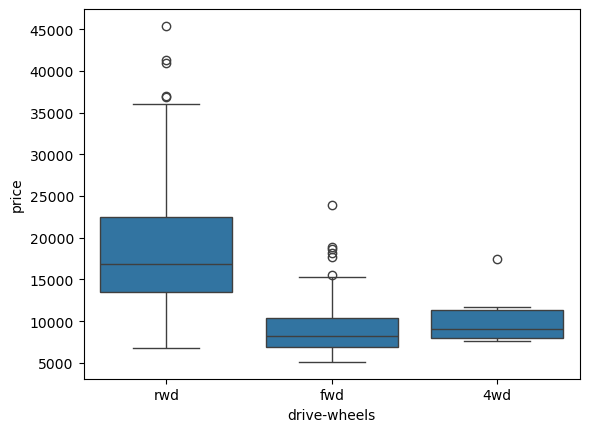

In [18]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Aquí vemos que la distribución de precio entre las diferentes categorías de drive-wheels difiere. Por lo tanto, drive-wheels podría ser un predictor del precio

## Análisis descriptivo

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


In [20]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


## Conteo de valores
El conteo de valores es una buena forma de entender cuántas unidades de cada característica/variable tenemos.

In [21]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [22]:
# convertimos la serie en un dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()


In [23]:
# verificamos el nombre de la columna
drive_wheels_counts.columns

Index(['count'], dtype='object')

In [24]:
# cambiamos el nombre de la columna
drive_wheels_counts.rename(columns={"count":"value_counts"}, inplace=True)
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [25]:
df['engine-location'].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

In [26]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'value_counts': 'value_counts'}, inplace=True)
# renombramos el indice
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,count
engine-location,
front,198
rear,3


Después de examinar el conteo de valores de la ubicación del motor, vemos que la ubicación del motor no sería una buena variable predictora para el precio. Esto se debe a que solo tenemos tres coches con motor trasero y 198 con motor delantero, por lo que este resultado está sesgado. Por lo tanto, no podemos sacar conclusiones sobre la ubicación del motor.

## Conceptos básicos de agrupación

In [27]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Si queremos saber, en promedio, qué tipo de rueda motriz es más valiosa, podemos agrupar "drive-wheels" y luego promediarlos.</p>

<p>Podemos seleccionar las columnas 'drive-wheels', 'body-style' y 'price', y luego asignarlas a la variable df_group_one.</p>

In [28]:
df_group_one = df[['drive-wheels','body-style','price']]

In [29]:
# resultados de agrupación
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False)["price"].mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


De nuestros datos, parece que los vehículos con tracción trasera son, en promedio, los más caros, mientras que los de 4 ruedas y tracción delantera tienen aproximadamente el mismo precio.

**Agrupamos por múltiples variables**

In [30]:
# resultados de agrupación
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


## Tabla dinámica

Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el dataframe a una tabla dinámica usando el método "pivot" para crear una tabla dinámica a partir de los grupos.

In [31]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [32]:
grouped_pivot = grouped_pivot.fillna(0) # llenar valores faltantes con 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

**A continuación se utiliza la función "groupby" para encontrar el precio promedio de cada automóvil basado en "body-style".**

In [33]:
# resultados de agrupación
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


**A continuación se usa un mapa de calor para visualizar la relación entre Estilo de Carrocería vs Precio.**

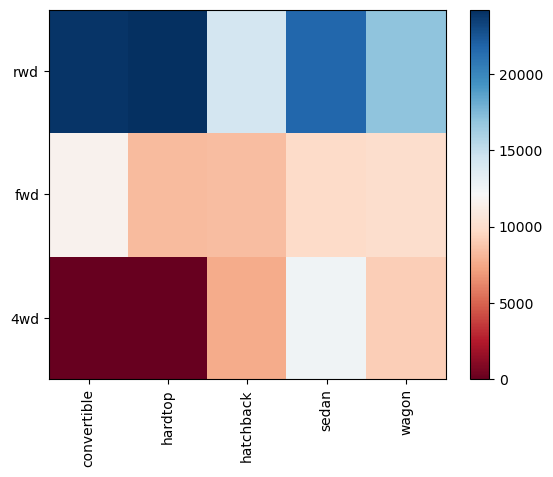

In [35]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# nombres de etiquetas
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# mover marcas y etiquetas al centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insertar etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotar etiqueta si es demasiado larga
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlación y causalidad

### Correlación de Pearson

La Correlación de Pearson mide la dependencia lineal entre dos variables X e Y.
El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

- 1: Correlación lineal positiva perfecta
- 0: Sin correlación lineal, las dos variables probablemente no se afecten mutuamente
- -1: Correlación lineal negativa perfecta

### P-value

 El P-value es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que tenemos un 95% de confianza en que la correlación entre las variables es significativa.
Por convención, cuando el:

- p-value es < 0.001: decimos que hay evidencia fuerte de que la correlación es significativa
- p-value es < 0.05: hay evidencia moderada de que la correlación es significativa
- p-value es < 0.1: hay evidencia débil de que la correlación es significativa
- p-value es > 0.1: no hay evidencia de que la correlación sea significativa

Resumeidamente:

- r de Pearson → mide la magnitud de la correlación.

- p-valor → indica si esa correlación es estadísticamente significativa.

In [38]:
data.corr() # solo variables numericas

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133


#### Wheel-base vs Price

In [40]:
df[['wheel-base','price']].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


In [39]:
from scipy import stats

In [42]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('El coeficiente de correlación de Pearson es: ', pearson_coef, 'con un P-value de P =', p_value)

El coeficiente de correlación de Pearson es:  0.5846418222655083 con un P-value de P = 8.076488270732552e-20


Conclusión: la correlación entre wheel-base y price es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte

#### Horsepower vs. Price

In [50]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('El coeficiente de correlación de Pearson es: ', pearson_coef, 'con un P-value de P =', p_value)


El coeficiente de correlación de Pearson es:  0.8096068016571052 con un P-value de P = 6.273536270651023e-48


Conclusión: la correlación entre wheel-base y price es estadísticamente significativa, y la relación lineal es bastante fuerte.

#### Length vs. Price

In [51]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("El Coeficiente de Correlación de Pearson es", pearson_coef, " con un P-value de P = ", p_value)

El Coeficiente de Correlación de Pearson es 0.6906283804483644  con un P-value de P =  8.016477466158383e-30


Conclusión: la correlación entre length y price es estadísticamente significativa, y la relación lineal es moderadamente fuerte

#### Width vs. Price

In [49]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("El Coeficiente de Correlación de Pearson es", pearson_coef, " con un P-value de P =", p_value)

El Coeficiente de Correlación de Pearson es 0.7512653440522665  con un P-value de P = 9.200335510484122e-38


Conslusión: la correlación entre width y price es estadísticamente significativa, y la relación lineal es bastante fuerte

#### Curb-Weight vs. Price

In [52]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("El Coeficiente de Correlación de Pearson es", pearson_coef, " con un P-value de P = ", p_value)

El Coeficiente de Correlación de Pearson es 0.8344145257702849  con un P-value de P =  2.189577238893391e-53


Conclusión: la correlación entre curb-weight y price es estadísticamente significativa, y la relación lineal es bastante fuerte 

#### Engine-Size vs. Price

In [53]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("El Coeficiente de Correlación de Pearson es", pearson_coef, " con un P-value de P =", p_value)

El Coeficiente de Correlación de Pearson es 0.8723351674455185  con un P-value de P = 9.265491622198793e-64


Conclusión: la correlación entre engine-size y price es estadísticamente significativa, y la relación lineal es muy fuerte 

#### Bore vs. Price

In [54]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("El Coeficiente de Correlación de Pearson es", pearson_coef, " con un P-value de P =  ", p_value)

El Coeficiente de Correlación de Pearson es 0.5431553832626606  con un P-value de P =   8.049189483935034e-17


Conclusión:  como el p-value es < 0.001, la correlación entre bore y price es estadísticamente significativa, pero la relación lineal es solo moderada

#### City-mpg vs. Price

In [55]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("El Coeficiente de Correlación de Pearson es", pearson_coef, " con un P-value de P = ", p_value)

El Coeficiente de Correlación de Pearson es -0.6865710067844681  con un P-value de P =  2.3211320655673725e-29


Conclusión: como el p-value es < 0.001, la correlación entre city-mpg y price es estadísticamente significativa, y el coeficiente de aproximadamente -0.687 muestra que la relación es negativa y moderadamente fuerte.

## Conclusión: variables importantes

Ahora tenemos una mejor idea de cómo se ven nuestros datos y qué variables son importantes a considerar al predecir el precio del automóvil. Hemos reducido a las siguientes variables:

**Variables numéricas continuas:**

+ Length
+ Width
+ Curb-weight
+ Engine-size
+ Horsepower
+ City-mpg
+ Wheel-base
+ Bore

**Variables categóricas:**
+ Drive-wheels